# <font color='#2F4F4F'>AfterWork Data Science: Time Series Analysis and Forecasting  with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understading </font>

### a) Specifying the Research Question

We are building a time series & forecasting model to predict the number of taxi orders for the next hour.

### b) Defining the Metric for Success

A time series & forecasting model with a RMSE metric on the test set not be more than 48.


### c) Understanding the Context 

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours. We need to predict the number of taxi orders for the next hour. Build a model for such a prediction.

### d)Project description
Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

Project instructions
Download the data and resample it by one hour.
Analyze the data.
Train different models with different hyperparameters. The test sample should be 10% of the initial dataset.
Test the data using the test sample and provide a conclusion.

### e) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings 
* Recommendation
* Challenges


###Data description
The data is stored in file taxi.csv. The number of orders is in the 'num_orders' column.

## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [83]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



In [84]:
# loading and previewing the dataset
df = pd.read_csv('https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0])

df.sort_index(inplace=True)
df = df.resample('1h').sum()

df.head(3)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71


## <font color='#2F4F4F'>Step 3. Data Preparation</font>

In [85]:
# check dataset shape

df.shape

(4416, 1)

Our dataset has 4416 records and 1 variable.

In [86]:
# preview variable datatypes
df.dtypes

num_orders    int64
dtype: object

num_orders variable has interger data type.

In [87]:
# check for missing values
df.isna().sum()

num_orders    0
dtype: int64

In [88]:
#Checking the unique values in each variable to confirm that there are no missing values
columns = df.columns

for col in columns:
    print("Variable:", col)
    print("Number of unique values:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: num_orders
Number of unique values: 251
[124  85  71  66  43   6  12  15  34  69  64  96  30  32  48  44  73  45
  61 113  58  90 120  75  20  11   7  46  54  91  36  59  82  83  89  49
  93 101 119  72 163 108  25   9  17  56  52  57  28  41  76  68  63  60
  26  42  27  22  39  19  51  80  77  86 176  16   3  14  31  50  62  37
  40  47  10  81 100 121  24  38  55  99 127  94 143  78  65  97 114  88
  79  84  29   1   4  70 117   5  18  53 102  33 107 118 153 105  67  35
 109  21   8 123 110 134 133 137 126  13  74  95 139  87 106  92 148 182
 104 131  98   2 112 103 128 166 111  23   0 129 164 165 138 142 159 115
 130 135 150 167 147 253 140 172 116 125 162 201 136 146 154 145 155 158
 156 193 197 234 157 122 144 149 171 152 174 186 132 194 183 188 229 173
 185 161 151 190 192 184 160 203 180 141 168 224 187 251 198 245 222 213
 195 215 178 177 216 223 179 170 169 248 204 230 196 211 212 249 226 175
 273 437 231 219 214 202 191 281 254 210 200 272 462 239 240 205 247 242
 

There is no missing value in the data.

In [89]:
# describe data

df.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


No missing values found. 

## <font color='#2F4F4F'>Step 4. Data Analysis</font>

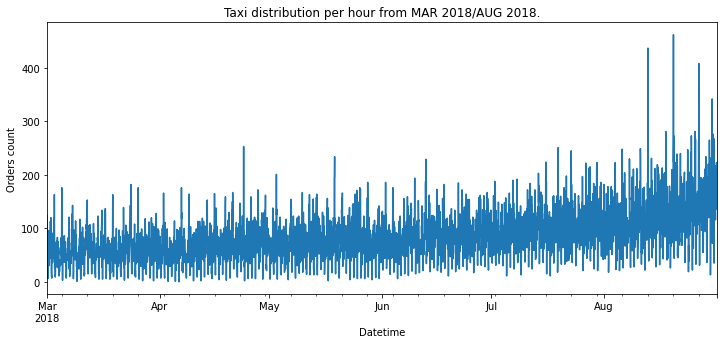

In [90]:
#distribution  per hour from Mar-Aug 2018

plt.figure(figsize=(12,5))
df['num_orders'].plot()
plt.title('Taxi distribution per hour from MAR 2018/AUG 2018.')
plt.xlabel('Datetime')
plt.ylabel('Orders count')
plt.show()

The total number of trips is increasing towards August

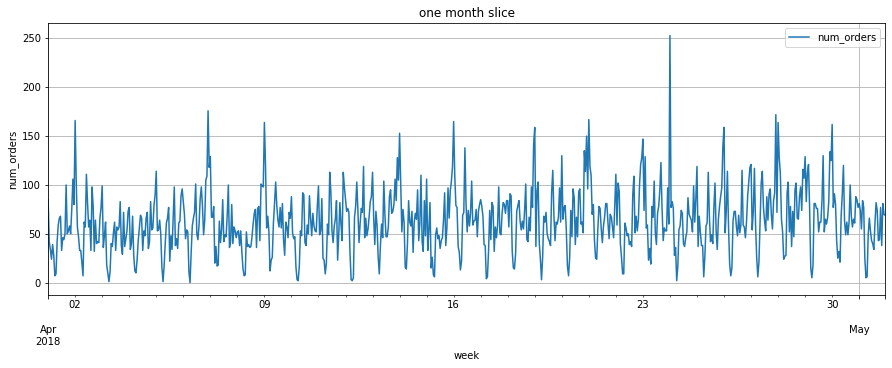

In [91]:
#splitting data to view week trend

df['2018-04-01':'2018-05-01'].plot(grid=True,figsize=(15,5))
plt.title('one month slice')
plt.xlabel('week')
plt.ylabel('num_orders');

Splitting the data into weeks, indicates weekends are more busy.

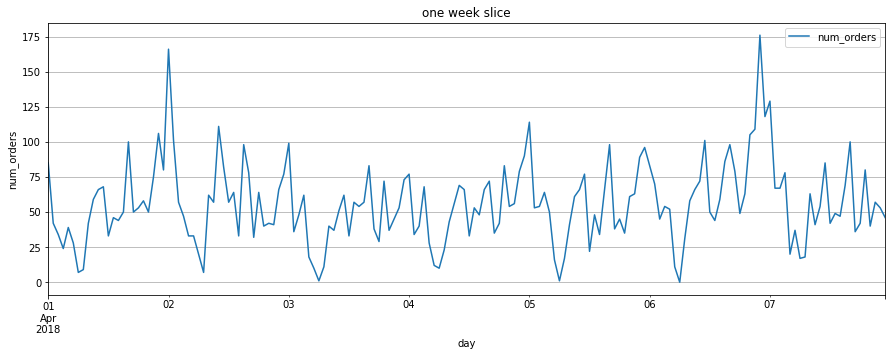

In [92]:
#splitting data to one week

df['2018-04-01':'2018-04-07'].plot(grid=True,figsize=(15,5))
plt.title('one week slice')
plt.xlabel('day')
plt.ylabel('num_orders');

There's no pattern of spikes here.

## <font color='#2F4F4F'>Step 5. Data Modelling</font>

In [105]:
#import libraries

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

In [96]:
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-01 00:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


The training set starts on March 3, 2018, and ends on July 26, 2018, and the

test begins on July 26,2018 to August 31, 2018.

In [97]:
#using a constant value: median level of taxi orders so that you can correlate it with the MAE metric value
print('Median daily taxi orders:', test['num_orders'].median())
pred_median = np.ones(test.shape) * train['num_orders'].median()
print('MAE:', mean_absolute_error(test, pred_median))

Median daily taxi orders: 135.0
MAE: 70.7918552036199


In [98]:
#using the previous value in the series to  predict the taxi orders and find the MAE value for this prediction.
print('Median daily taxi orders:', test['num_orders'].median())

pred_previous = test.shift()

pred_previous.iloc[0] = train.iloc[-1]
print('MAE:', mean_absolute_error(test, pred_previous))

#10%
# With this forecast, the model's accuracy increases, and the model is sanity-checked,

Median daily taxi orders: 135.0
MAE: 44.97285067873303


In [99]:
#Creating features.

def make_features(df, max_lag):
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)
    
    df.dropna(inplace=True)


In [100]:
make_features(df, 12)
df.columns

Index(['num_orders', 'month', 'day', 'dayofweek', 'hour', 'lag_1', 'lag_2',
       'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10',
       'lag_11', 'lag_12'],
      dtype='object')

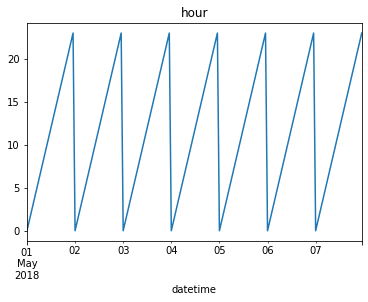

In [101]:
#Plotting features
df['hour']['2018-05-01':'2018-05-07'].plot()
plt.title('hour');

In [102]:
# splitting into 90-10 train-test sets - as per project requirement

#split data set
train, test = train_test_split(df, shuffle=False, test_size=0.1)

#confirm size of datasets
print(df.shape)
print(train.shape)
print(test.shape)

(4404, 17)
(3963, 17)
(441, 17)


######Model Training

In [103]:
#Split the dataset into training and test sets at a 4:1 ratio

def make_features(df, max_lag, rolling_mean_size):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['week'] = df.index.week
    df['is_weekend'] = df.dayofweek.isin([5,6])*1
    df['hour'] = df.index.hour
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = (
        df['num_orders'].shift().rolling(rolling_mean_size).mean()
    )

# we chose argument values at random
make_features(df, 1, 1)


train, test = train_test_split(df, shuffle=False, test_size=0.2)

print(train.shape)
print(test.shape)
print(train.isnull().sum())

#drop rows that have Nan values
train.dropna(axis=0,inplace=True)

(3523, 21)
(881, 21)
num_orders      0
month           0
day             0
dayofweek       0
hour            0
lag_1           1
lag_2           0
lag_3           0
lag_4           0
lag_5           0
lag_6           0
lag_7           0
lag_8           0
lag_9           0
lag_10          0
lag_11          0
lag_12          0
year            0
week            0
is_weekend      0
rolling_mean    1
dtype: int64


In [104]:
#Training Model

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

model = LinearRegression()
model.fit(features_train, target_train)

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(
    'MAE for the training set:', mean_absolute_error(target_train, pred_train)
)
print('MAE for the test set:', mean_absolute_error(target_test, pred_test))

#The previous MAE value for the test was 44 and now noticeably lower

MAE for the training set: 22.23021148161838
MAE for the test set: 35.331503464830874


In [106]:
from sklearn import metrics 
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(target_test, pred_test)))

Linear Regression RMSE: 47.425917435396755


The RMSE metric on the test set should be < 48, Linear Regression is at 47.42

In [107]:
#using Random Forest  model to improve the metric score
random_model = RandomForestRegressor()
random_model.fit(features_train, target_train)

pred_train_random = model.predict(features_train)
pred_test_random = model.predict(features_test)

print('Random Forest Regression RMSE:', np.sqrt(metrics.mean_squared_error(target_test, pred_test_random)))

Random Forest Regression RMSE: 47.425917435396755


The RMSE metric on the test set should be less than 48, Random Forest is at 47.60

## <font color='#2F4F4F'>Step 5. Summary of Findings</font>



Conclusion?
1.   From the above models used, using RMSE both Linear Regressor & Random Forest can be used for predictions.
2.   Both models had an RMSE of 47.25 which is below the target 48.






## <font color='#2F4F4F'>Step 5. Challenging your solution</font>

a) Did we have the right question?

YES

b) Did we have the right data?

YES


c) What can be done to improve the solution?

Perform more feature engineering
Use 80:20 to split training and test data.